# 459 重复的字符串
输入：非空字符串  
要求：判断输入字符串是否可以由它的一个字串重复多次构成  
输出：True / False

## 思路
### 所有思路的起点都是暴力
一个for循环判断字串的**终止位置**， 然后判断字串能否重复构成字符串继续嵌套一个for循环  
    - 动辄O(n^2)的时间复杂度  
- 只需要判断第一个字符开始的字串就可以  
- 如果一个字串重复可以构成字符串，必定要从第一个字符开始  
- 所以一个for循环获取字串的终止位置就行了  

获取字串的终止位置：也不用遍历到末尾，遍历到中间位置就行  
- 如果子串的长度都大于一半了，一定不能通过重复构成字符串  

### 移动匹配法
核心： 如果一个字串s能够重复并组成字符串，那么***两个s拼接后的中间部分还能够截取出一段s***，就说明字符串能够由s重复组成  

通过移动匹配还是需要判断字符串 s+s 中是否出现 s，使用库函数也消耗了一定的时间复杂度  
- 暴力解法是m * n，一般库函数实现为 O(m + n)  

### KMP算法
KMP 的当家本领：**在一个串中查找是否出现过另一个串** ！！

KMP 的前缀表：统计了各个位置为终点的字串的最长相同前后缀的长度  

两个假设：  
1. 字符串s由重复子串构成  
2. 最长相等前后缀 不包含的字串一定是s的最小重复子串
   - 1是2的充分条件，2是1的必要条件  
  
所以问题是：**什么时候，最长相等前后缀不包含的字串是s的最小重复子串**？  

##### 结论：最长相等前后缀不包含的字串长度 可以被 字符串s的长度 整除的时候，不包含的这个字串就是s的最小重复子串  

#### 再次理解next数组
- next[i] 记录了长度为 i 的字符串的最大相等前后缀的长度为 next[i] + 1  
- next数组以统一 **减一** 的方式计算  

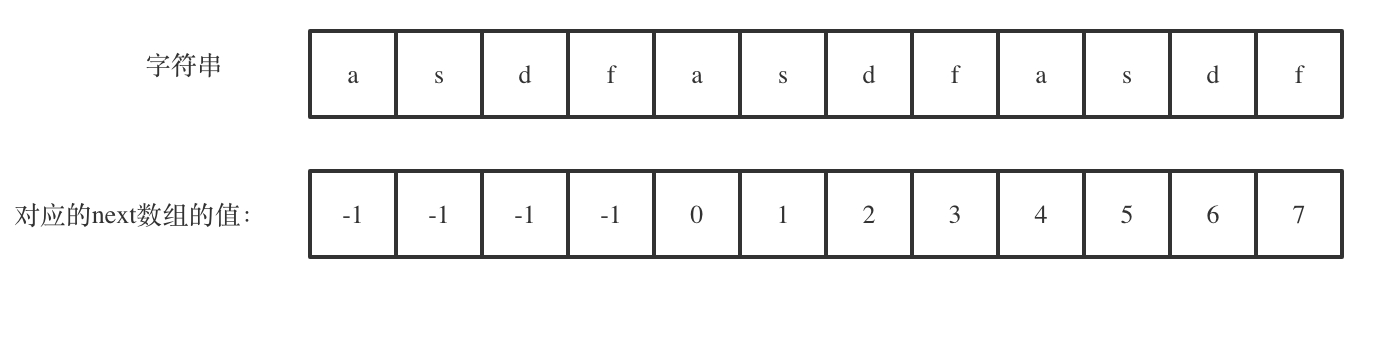

综上所述，如果 len % (len - (next[len - 1] + 1)) == 0 ，  
说明数组的长度刚好可以被 最长相等前后缀不包含的字串长度 整除  
**即该字符串有重复的子字符串**

PS：计算 next 数组的两种方式，减一和不减一，  
区别在于初始化next[0]是-1还是0

In [ ]:
# 不减一版本
# next[0] 初始化为 0

class solution:
    def repeatSubstringPatttern(self, s:str) -> bool:
        if len(s) == 0:
            return False
        nxt = [0] * len(s)
        self.getNext(nxt, s)
        if nxt[-1] != 0 and len(s) % (len(s) - nxt[-1]) == 0:
            return True
        return False
    
    def getNext(self, nxt, s):
        nxt[0] = 0
        j = 0
        for i in range(1, len(s)):
            while j > 0 and s[i] != s[j]:
                j = nxt[j-1]
            if s[i] == s[j]:
                j += 1
            nxt[i] = j
        return nxt

In [ ]:
# 极简版：使用find

class Solution:
    def repeatSubstringPatttern(self, s:str) -> bool:
        n = len(s)
        if n <= 1:
            return False
        ss = s[1:] + s[:-1]  # 除去首尾拼接起来
        print(ss.find(s))    # 没找到会返回-1
        return ss.find(s) != -1

In [ ]:
# 暴力法
class solution:
    def repeatSubstringPatttern(self, s:str) -> bool:
        n = len(s)
        if n<=1:   # 只有一个元素的时候其实没有字串
            return False
        
        substr = ""
        for i in range(1, n//2 + 1):
            if n % i == 0:     # 如果最小重复子串存在，其长度一定能够整除n
                substr = s[:i]
                if substr * (n//i) == s:
                    return True
        
        return False
